# 图片布局

## subplot  

plt.subplot(2,1,1)会将原始的图像切割成2个子图像，是2行1列，并将现在的操作位置转到第一个子图上，这样便实现了绘制子图的方法。

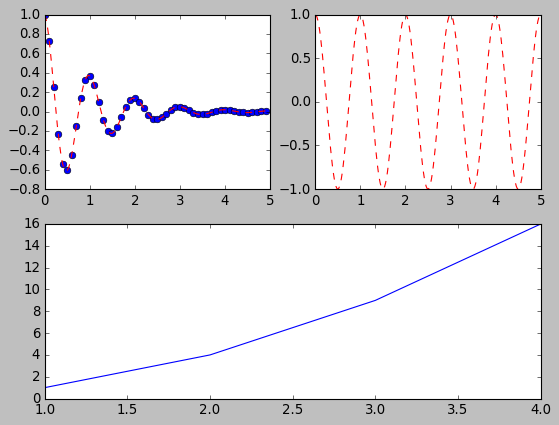

In [40]:

def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)
 
 
t1 = np.arange(0, 5, 0.1)
t2 = np.arange(0, 5, 0.02)
 
plt.figure(12)
plt.subplot(221)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'r--')
 
plt.subplot(222)
plt.plot(t2, np.cos(2 * np.pi * t2), 'r--')
 
plt.subplot(212)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

## subplots  

subplots返回的值的类型为元组，其中包含两个元素：第一个为一个画布，第二个是子图 

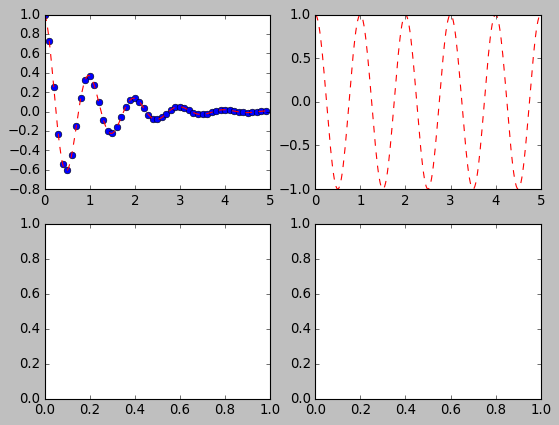

In [41]:
fig,ax = plt.subplots(2,2)
ax[0][0].plot(t1, f(t1), 'bo', t2, f(t2), 'r--')
ax[0][1].plot(t2, np.cos(2 * np.pi * t2), 'r--')

# Scatter图

scatter图的画法如下：  
```python  
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)[source]
```

|属性|值|说明|
|---|---|---|
|x,y|||
|s|scalar,array|markersize的大小|
|c|color|marker的颜色|
|markder|MarkerStyle|..|
|cmap|colormap|详见colormap|
|norm|Normalized|归一化c的值|
|vmin,vmax|和norm配合使用归一化c的值||
|alpha|scalar|透明度|
|linewidths|||
|edgecolors|||
|`**kwargs`|||

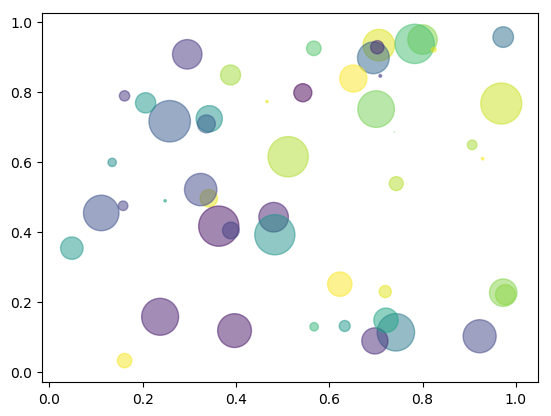

In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

# Bar图

首先我们来看一下bar的性质  

```python  
matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
```

|参数|说明|
|---|---|
|x|bar的横坐标|
|height |bar的高度|
|width|bar的宽度|
|bottom|bar的纵坐标(默认为0)|
|align|center:将bar的中心对准x<br>edeg：将bar的左边对准x|
|color|设置bar的颜色|
|linewidth|bar的边缘宽度|
|xerr/yerr|x,y方向的errorbar|
|ecolor|errobar的颜色|
|error_kw|同时设置多个errorbar的性质,error_kw={'ecolor':'red'}|
|orientation|设置水平，垂直|  

本文主要讲述一下几个bar图的实现：  

* [垂直Bar图](#1)  
* [叠加Bar图](#2)  
* [水平Bar图](#3)

## <span id="1">单个bar图的实现</span>

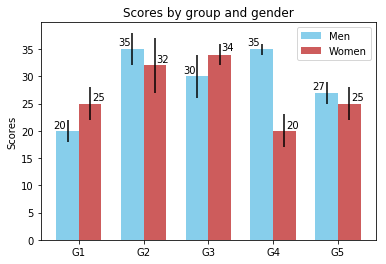

In [3]:
men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()

## <span id="2">叠加图</span>

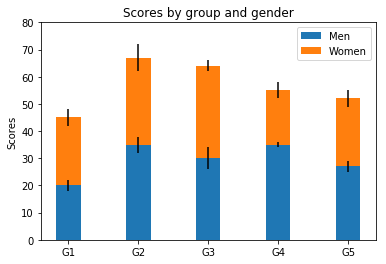

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

## <span id="3">绘制水平bar图</span>

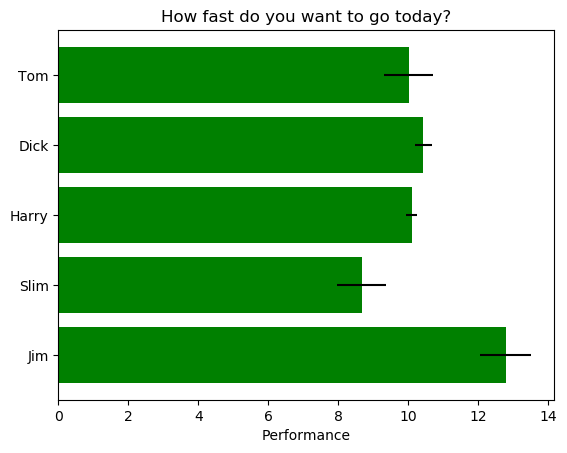

In [4]:
# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

# Hist图  

hist图的主要定义方式如下:  

```python  
matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
```

|属性|说明|输入参数|
|---|---|---|
|x|||
|bins|int:多少个柱子<br>sequence:给定bin的x坐标<br>str:bin strategy||
|range|bin的最大最小值:tuple或者none|tuple, none|
|density|使得hist归一化相加为1|bool|
|weigths|加权后的x|array(跟x一样大小)|
|cumulative|累加图|bool|
|bottom|bin的底部基准线（默认0）|array|
|histype|见官方手册|{bar,barstacked,step,stepfilled}|
|align|bar与bin的边缘对齐关系|left,mid,right|
|orientation||horizontal, vertical|
|rwidth|bar的宽度|int, none|
|log|将x,y设置为log|bool|
|color||color|
|stacked|是否堆叠|bool|

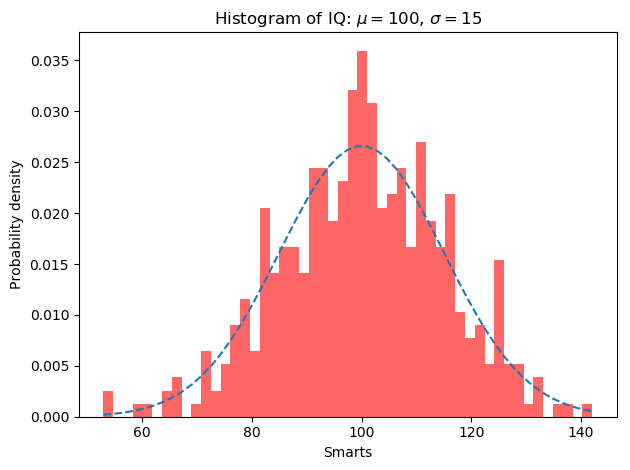

In [8]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1,color="red",alpha=0.6)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# Pie图

饼图的主要方法如下：  

```python  
matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
```

|属性|值|说明|
|---|---|---|
|x | | |
| explode|array(x.size),none |设置饼图突出部分的比例 |
| labels| list|为每个块给定label |
| colors|array(x.size) |为每个块给定color |
| autopct| none,string,function|为每个块给定占的百分比 |
| pctdistance|块中心距离与autopct生成的text的距离 | |
| shadow| bool|绘制阴影 |
| labeldistance|float |块label的位置 |
| startangle| float|旋转饼图 |
| radius| float|饼图半径 |
| counterclock|bool |顺时针还是逆时针 |
| wedgeprops|dict,none |同时设置，wedgeprops = {'linewidth': 3}  |
| textprops|dict |Dict of arguments to pass to the text objects. |
| center|（x,y） |饼图的中心坐标 |
| rotatelabels| bool| |

## 基础饼图

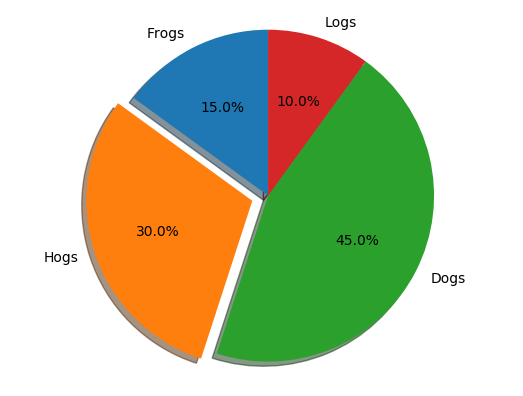

In [9]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 多个饼图在一起

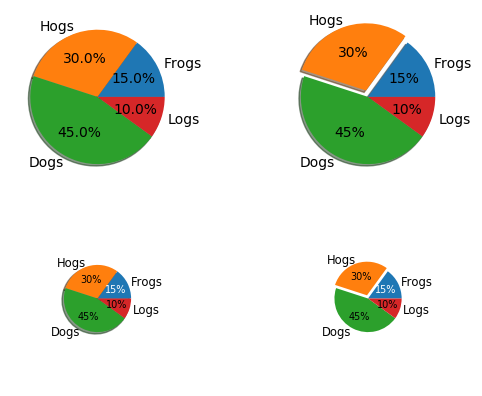

In [10]:
# Some data
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

# Make figure and axes
fig, axs = plt.subplots(2, 2)

# A standard pie plot
axs[0, 0].pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

# Shift the second slice using explode
axs[0, 1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.1, 0, 0))

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axs[1, 0].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=True, radius=0.5)
# Make percent texts even smaller
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

# Use a smaller explode and turn of the shadow for better visibility
patches, texts, autotexts = axs[1, 1].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
                                          explode=(0, 0.05, 0, 0))
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.show()

## 饼图注释

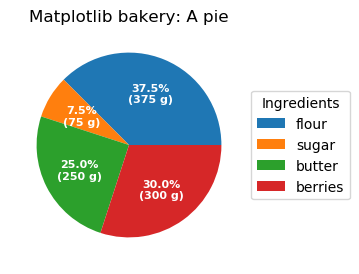

In [11]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

# box箱图

```python  
matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, *, data=None)
```

|属性|值|说明|
|----|----|----|
|x|array||
|notch|bool|生成一个有缺口的box(true)，不然就是方形的(false)|
|sym|str,none|flier points的显示样式|
|vert|boole|true: max box vertical|
|whis|float,sequence,string||
|bootstrap|||
|usermedians|||
|conf_intervals|||
|positions|||
|widths|||
|path_artist|||
|labels|||
|manage_xticks|||
|autorange|||
|meanline|||
|zorder|||
|showcaps|||
|showbox|||
|showfliers|||
|showmeans|||
|capprops|||
|boxprops|||
|whiskerprops|||
|flierprops|||
|medianprops|||
|meanprops|||

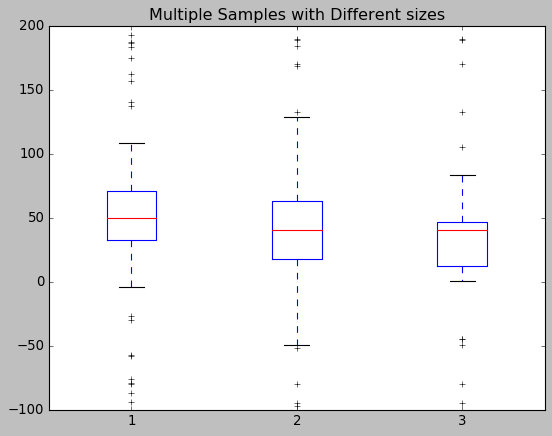

In [44]:
# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
data.shape = (-1, 1)
d2.shape = (-1, 1)

data = [data, d2, d2[::2,0]]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()

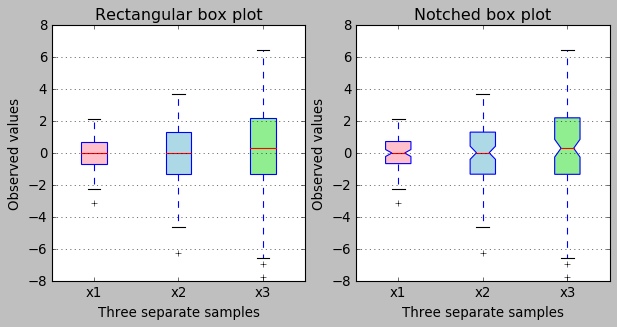

In [45]:
# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

# Text标注与注释

## Text

```python  
matplotlib.pyplot.text(x, y, string, fontdict=None, withdash=False, **kwargs)
```

## Annotate


```python  
matplotlib.pyplot.annotate(s, xy, *args, **kwargs)
```

|属性|值|说明|
|----|----|---|
|s|text|注释内容|
|xy|(float,float)|箭头指向的位置|
|xytext|(float,float)|注释的位置|
|xycoords|str|coordinate system that xy is given in.|
|textcoords|str|The coordinate system that xytext is given in.|
|arrowprops|dict|绘制从文本到目标点的样式width,headwidth,headlength,shrink|

Text(1, 30, 'annotate')

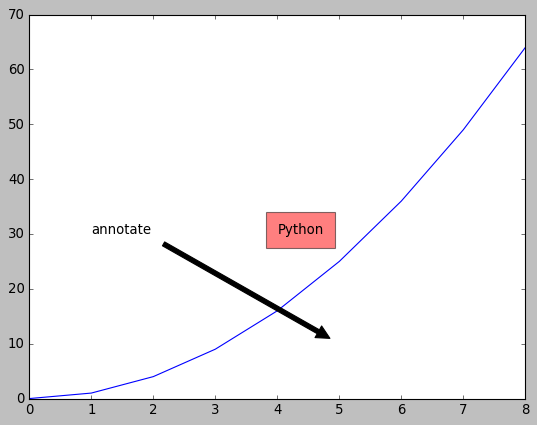

In [39]:
t = np.arange(9)
plt.plot(t,t**2)
plt.text(4,30,"Python", bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.annotate('annotate', xy=(5, 10), xytext=(1, 30),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Plot高级

## Style控制

matplotlib的有很多的style，可以通过`plt.style.available`查看：  

```text  
['seaborn-dark', 'dark_background', 'seaborn-pastel', 'seaborn-colorblind', 'tableau-colorblind10', 'seaborn-notebook', 'seaborn-dark-palette', 'grayscale', 'seaborn-poster', 'seaborn', 'bmh', 'seaborn-talk', 'seaborn-ticks', '_classic_test', 'ggplot', 'seaborn-white', 'classic', 'Solarize_Light2', 'seaborn-paper', 'fast', 'fivethirtyeight', 'seaborn-muted', 'seaborn-whitegrid', 'seaborn-darkgrid', 'seaborn-bright', 'seaborn-deep']
```

## 面向对象绘图

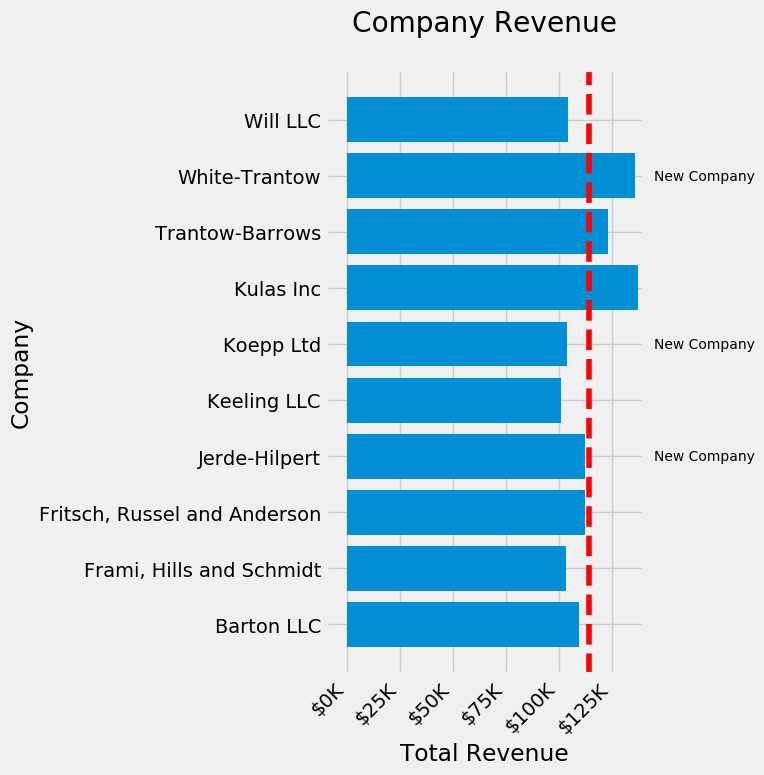

In [24]:
from matplotlib import ticker

# 通过ticker.FuncFormatter类来自定义label的显示样式
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = ticker.FuncFormatter(currency)


fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
# 通过ax.get_xticklabels获取label对象
labels = ax.get_xticklabels()
# 通过setp一下子设置多种属性
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

# 其他高级的图片

## Scatter Hist  

![](https://matplotlib.org/_images/sphx_glr_scatter_hist_001.png)  

代码在[这里](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py)